## **_PRÁCTICA 11  -  TAA_**
_Pablo Martín de Benito_
***

In [1]:
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from sklearn.cluster import KMeans
from statistics import mode
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

Importar los datos

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

y = data.target
y_array = np.array(y)


### **Clase kmedias_moda**

In [4]:
class kmedias_moda(object):
    def __init__(self,n_clusters = 2):      # Como poco el número de clasters debe ser el número de atributos
        self.k = n_clusters
        self.kmedias = KMeans(n_clusters)

    def fit(self, X_train, y_train):
        self.kmedias.fit(X_train)
        self.moda = np.zeros(self.k,dtype=int)-1
        for c in range(self.k):
            self.moda[c] = mode(y_train[self.kmedias.labels_ == c])

    def predict(self,X_test):
        return self.moda[self.kmedias.predict(X_test)]

    def score(self,X_test,y_test):
        return np.mean(self.predict(X_test) == y_test)


In [6]:
resul = pd.DataFrame(index=range(2,30,1), columns = ('Entrena', 'Verifica','T_Ejecución'))
resul.index_name = "Tamaño"

### **Validación Cruzada 10 particiones**

In [7]:
K = 10
kf = KFold(n_splits=K)
tamaños = np.arange(2,30,1) 
for tam in tamaños:
    r_clf = pd.DataFrame(columns=['Entrena','Verifica','T. Ejecución'])
    k = 0
    for train_index, test_index in tqdm(kf.split(X),total = kf.get_n_splits(X)):
            start_time = time.time()
            
            clf = kmedias_moda(tam)
            X_train = X[train_index,:]
            y_train = y[train_index]
            X_test = X[test_index,:]
            y_test = y[test_index]

            clf.fit(X_train, y_train)
            entrena = clf.score(X_train, y_train)
            verifica = clf.score(X_test, y_test)

            end_time = time.time()
            ejecucion = end_time - start_time

            r_clf.loc[k,:] = [entrena,verifica,ejecucion]

            k += 1
    r_clf.index.name = "Fold"

    print("\nMEDIA:")
    print(r_clf)
    mEntrena = np.mean(r_clf['Entrena'])
    mVerifica = np.mean(r_clf['Verifica'])
    mTiempo = np.mean(r_clf['T. Ejecución'])
    print("\nTiempo Total (seg) = ", r_clf['T. Ejecución'].sum(),"\n")
    resul.loc[tam,:] = [mEntrena,mVerifica,mTiempo]


100%|██████████| 10/10 [00:00<00:00, 49.31it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.939453  0.842105     0.053095
1     0.935547  0.859649     0.016129
2     0.935547  0.894737     0.015212
3     0.929688  0.912281     0.015896
4     0.929688  0.912281     0.016192
5     0.919922  0.964912     0.016493
6     0.919922  0.964912     0.015904
7     0.923828  0.964912      0.01547
8     0.921875  0.947368     0.015824
9     0.920078  0.964286     0.017111

Tiempo Total (seg) =  0.1973247528076172 



100%|██████████| 10/10 [00:00<00:00, 36.14it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.902344  0.894737     0.026623
1     0.910156  0.859649     0.028162
2     0.908203  0.877193     0.054857
3     0.908203  0.859649     0.027453
4     0.900391  0.894737     0.023659
5     0.896484  0.947368     0.019454
6     0.896484  0.947368     0.019816
7     0.892578  0.947368     0.020074
8     0.910156  0.877193      0.02611
9     0.898635  0.946429     0.025028

Tiempo Total (seg) =  0.27123570442199707 



100%|██████████| 10/10 [00:00<00:00, 40.78it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.896484  0.964912     0.028285
1     0.857422  0.824561     0.028532
2     0.921875  0.912281     0.024138
3     0.917969  0.912281     0.025553
4     0.917969  0.912281     0.023413
5     0.916016  0.947368     0.022611
6     0.917969  0.947368     0.021406
7     0.914062  0.947368      0.02152
8     0.929688  0.877193     0.021179
9      0.91423  0.946429     0.023669

Tiempo Total (seg) =  0.24030590057373047 



100%|██████████| 10/10 [00:00<00:00, 37.15it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.917969  0.877193     0.029744
1     0.933594  0.859649     0.027043
2     0.927734  0.929825     0.025889
3     0.925781  0.929825     0.025901
4     0.914062  0.912281     0.028702
5     0.925781  0.947368      0.02751
6     0.916016  0.964912     0.026289
7     0.919922  0.964912     0.026368
8     0.931641  0.877193     0.024832
9     0.920078  0.946429     0.021518

Tiempo Total (seg) =  0.2637956142425537 



100%|██████████| 10/10 [00:00<00:00, 41.69it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.921875  0.807018     0.029424
1     0.888672  0.842105     0.026972
2     0.890625  0.859649     0.020526
3     0.933594  0.947368     0.021172
4     0.927734  0.877193     0.020795
5     0.880859  0.912281     0.025771
6     0.884766  0.947368     0.021842
7     0.884766  0.859649     0.020929
8     0.876953  0.947368     0.023168
9     0.873294  0.946429     0.024459

Tiempo Total (seg) =  0.23505830764770508 



100%|██████████| 10/10 [00:00<00:00, 39.39it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.892578  0.912281     0.029992
1     0.931641  0.929825     0.028354
2     0.904297  0.912281     0.023417
3     0.914062  0.842105      0.02284
4     0.900391  0.894737     0.026206
5     0.916016  0.894737     0.021409
6      0.90625  0.964912     0.022284
7     0.910156  0.947368     0.024711
8     0.894531  0.807018     0.023549
9     0.896686     0.875     0.026154

Tiempo Total (seg) =  0.2489159107208252 



100%|██████████| 10/10 [00:00<00:00, 34.65it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.914062   0.77193     0.035654
1     0.917969  0.877193     0.031551
2     0.914062  0.877193     0.029272
3      0.90625  0.824561     0.028296
4     0.904297  0.894737     0.026528
5     0.908203  0.929825     0.023356
6     0.925781  0.947368     0.023655
7      0.90625  0.894737     0.024571
8     0.941406  0.982456     0.030007
9     0.896686  0.946429     0.030718

Tiempo Total (seg) =  0.28360772132873535 



100%|██████████| 10/10 [00:00<00:00, 33.76it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.957031  0.877193     0.038115
1     0.935547  0.947368     0.029965
2     0.933594  0.947368     0.027718
3     0.917969  0.824561     0.027504
4       0.9375  0.894737      0.02781
5     0.916016  0.947368     0.027144
6     0.916016  0.912281     0.027254
7     0.908203  0.859649     0.028975
8     0.925781  0.824561     0.029141
9     0.902534  0.892857      0.02776

Tiempo Total (seg) =  0.29138684272766113 



100%|██████████| 10/10 [00:00<00:00, 26.68it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.912109  0.964912     0.058106
1     0.921875  0.877193     0.037564
2     0.923828  0.894737     0.035502
3     0.931641  0.824561     0.036171
4     0.914062  0.859649     0.033145
5     0.914062  0.947368      0.03355
6     0.935547  0.929825      0.03391
7     0.927734  0.929825     0.035086
8     0.939453  0.842105     0.033619
9     0.957115  0.964286     0.032313

Tiempo Total (seg) =  0.36896729469299316 



100%|██████████| 10/10 [00:00<00:00, 31.99it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.955078  0.824561      0.03845
1     0.929688  0.929825      0.03081
2     0.951172  0.947368     0.026557
3     0.927734  0.877193     0.027815
4     0.914062  0.894737     0.036317
5     0.919922  0.947368     0.032591
6     0.931641  0.929825     0.028967
7     0.933594  0.877193     0.028941
8     0.933594  0.894737     0.029968
9     0.959064  0.982143     0.027671

Tiempo Total (seg) =  0.3080873489379883 



100%|██████████| 10/10 [00:00<00:00, 29.70it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.941406  0.807018      0.03823
1       0.9375  0.859649     0.036244
2     0.943359  0.929825     0.035512
3     0.921875  0.789474     0.038554
4     0.955078  0.947368     0.034143
5     0.939453  0.929825     0.028542
6     0.947266  0.982456     0.033303
7     0.941406  0.894737     0.029093
8     0.935547  0.912281     0.027726
9     0.945419  0.946429     0.029779

Tiempo Total (seg) =  0.331127405166626 



100%|██████████| 10/10 [00:00<00:00, 30.60it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.951172  0.912281     0.042421
1     0.927734  0.929825     0.035222
2     0.939453  0.947368     0.030331
3     0.951172  0.894737     0.032698
4     0.912109  0.912281     0.027671
5     0.953125  0.982456      0.02948
6       0.9375  0.982456     0.029428
7     0.957031  0.947368     0.034333
8     0.945312  0.912281     0.028606
9     0.951267  0.946429     0.031626

Tiempo Total (seg) =  0.32181763648986816 



100%|██████████| 10/10 [00:00<00:00, 30.60it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.955078  0.824561     0.039965
1     0.958984  0.894737     0.033839
2     0.933594  0.929825     0.029894
3     0.962891  0.947368     0.032272
4     0.947266  0.964912     0.028884
5     0.941406  0.964912     0.028984
6     0.949219  0.982456     0.030328
7     0.953125  0.982456     0.039189
8     0.933594  0.894737     0.029833
9     0.955166  0.946429     0.029208

Tiempo Total (seg) =  0.32239723205566406 



100%|██████████| 10/10 [00:00<00:00, 30.39it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0      0.96875  0.877193     0.038686
1     0.955078  0.929825     0.033879
2     0.939453  0.929825     0.030133
3     0.935547  0.807018     0.033311
4     0.933594  0.929825     0.031326
5     0.939453  0.929825     0.030901
6     0.921875  0.947368     0.031075
7     0.931641  0.894737     0.030423
8     0.943359  0.964912     0.031497
9     0.947368  0.964286     0.033491

Tiempo Total (seg) =  0.3247225284576416 



100%|██████████| 10/10 [00:00<00:00, 29.31it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.943359  0.859649      0.03701
1     0.931641  0.964912     0.035417
2     0.941406  0.947368     0.032532
3     0.941406  0.912281     0.034963
4     0.949219  0.947368      0.03164
5     0.966797  0.947368     0.031695
6     0.943359  0.964912     0.033444
7     0.951172  0.964912     0.034471
8     0.933594  0.947368     0.030874
9     0.955166  0.910714     0.034094

Tiempo Total (seg) =  0.33614039421081543 



100%|██████████| 10/10 [00:00<00:00, 25.09it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.960938  0.947368     0.072143
1     0.958984  0.947368      0.03559
2     0.958984  0.947368     0.037255
3     0.929688  0.947368     0.035815
4     0.960938  0.947368     0.035393
5      0.90625  0.947368     0.039139
6     0.957031  0.964912     0.034055
7     0.939453  0.982456     0.035328
8     0.947266  0.877193     0.034876
9     0.949318  0.964286     0.033588

Tiempo Total (seg) =  0.39318227767944336 



100%|██████████| 10/10 [00:00<00:00, 26.23it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.951172  0.912281     0.046262
1     0.939453  0.947368     0.036626
2     0.941406  0.947368     0.035507
3     0.958984  0.964912     0.039447
4     0.951172  0.929825     0.034738
5     0.933594  0.982456     0.037257
6       0.9375  0.964912     0.037938
7     0.947266  0.964912     0.034933
8     0.955078  0.947368     0.035727
9     0.959064  0.982143     0.037509

Tiempo Total (seg) =  0.375943660736084 



100%|██████████| 10/10 [00:00<00:00, 25.93it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.955078  0.824561     0.044901
1     0.960938  0.947368     0.038923
2     0.931641  0.912281     0.035488
3     0.941406  0.947368     0.039128
4     0.951172  0.964912       0.0365
5     0.951172  0.982456     0.035992
6     0.941406  0.982456     0.037671
7     0.958984  0.929825     0.035638
8     0.955078  0.929825     0.036712
9     0.957115  0.964286     0.038651

Tiempo Total (seg) =  0.37960171699523926 



100%|██████████| 10/10 [00:00<00:00, 25.37it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.955078  0.964912     0.047874
1      0.96875  0.947368     0.037127
2     0.947266  0.964912     0.036368
3     0.931641  0.894737     0.041011
4     0.957031  0.964912     0.038223
5     0.949219  0.947368     0.038108
6     0.931641  0.964912     0.040431
7     0.949219  0.982456     0.035444
8     0.935547  0.964912     0.034996
9     0.947368  0.928571     0.039302

Tiempo Total (seg) =  0.3888845443725586 



100%|██████████| 10/10 [00:00<00:00, 23.94it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.964844  0.929825     0.052103
1     0.962891  0.947368     0.045819
2     0.949219  0.964912     0.038965
3     0.947266  0.894737      0.04032
4     0.957031  0.964912     0.037763
5     0.958984  0.964912     0.040121
6     0.949219  0.982456      0.03976
7     0.941406  0.929825     0.039118
8     0.947266  0.929825      0.03702
9     0.945419  0.892857     0.041154

Tiempo Total (seg) =  0.4121427536010742 



100%|██████████| 10/10 [00:00<00:00, 20.76it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0       0.9375  0.947368     0.052523
1     0.960938  0.929825      0.04576
2       0.9375  0.947368     0.046092
3     0.951172  0.982456     0.045815
4     0.943359  0.929825     0.045846
5     0.939453  0.929825     0.045476
6     0.955078  0.982456     0.049126
7     0.958984  0.947368     0.046054
8     0.955078  0.947368     0.048172
9     0.962963  0.946429      0.05052

Tiempo Total (seg) =  0.4753835201263428 



100%|██████████| 10/10 [00:00<00:00, 22.01it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.949219  0.912281     0.052454
1     0.958984  0.964912     0.048822
2     0.947266  0.964912     0.048132
3     0.941406  0.912281     0.047994
4     0.941406  0.947368     0.043772
5     0.955078  0.982456     0.042525
6       0.9375  0.964912     0.039985
7     0.941406  0.929825     0.039324
8     0.945312  0.982456     0.041345
9     0.962963  0.928571     0.044291

Tiempo Total (seg) =  0.44864368438720703 



100%|██████████| 10/10 [00:00<00:00, 18.17it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.949219  0.912281     0.084457
1     0.960938  0.964912     0.043535
2     0.957031  0.964912     0.052169
3     0.945312  0.877193     0.047542
4     0.939453  0.929825      0.05384
5     0.955078  0.964912     0.051668
6     0.949219  0.982456     0.053587
7     0.927734  0.894737     0.051602
8     0.947266  0.982456     0.052813
9     0.962963  0.982143     0.052346

Tiempo Total (seg) =  0.5435569286346436 



100%|██████████| 10/10 [00:00<00:00, 20.45it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.957031  0.912281     0.057884
1     0.943359  0.912281      0.04835
2     0.955078  0.964912      0.04954
3     0.957031  0.947368     0.042783
4     0.951172  0.947368     0.047767
5     0.945312  0.964912     0.056855
6     0.949219  0.982456     0.044159
7     0.945312  0.964912      0.04142
8     0.957031  0.912281      0.04411
9     0.957115  0.982143      0.04355

Tiempo Total (seg) =  0.47641825675964355 



100%|██████████| 10/10 [00:00<00:00, 20.91it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.947266  0.877193     0.054497
1     0.947266  0.947368     0.044273
2     0.957031  0.947368     0.044974
3     0.960938  0.964912     0.045371
4     0.949219  0.947368     0.045132
5     0.939453  0.964912     0.041175
6     0.964844  0.982456     0.046748
7     0.949219  0.964912     0.042632
8     0.960938  0.964912      0.05451
9     0.955166  0.964286     0.053551

Tiempo Total (seg) =  0.47286343574523926 



100%|██████████| 10/10 [00:00<00:00, 19.53it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.939453  0.894737     0.060318
1     0.949219  0.894737     0.045076
2     0.958984  0.982456     0.055734
3     0.958984  0.964912     0.051462
4     0.957031  0.947368     0.050346
5     0.949219  0.964912     0.045029
6       0.9375  0.982456     0.045968
7     0.957031  0.912281     0.054347
8     0.943359  0.982456     0.044459
9     0.951267  0.928571     0.053634

Tiempo Total (seg) =  0.5063729286193848 



100%|██████████| 10/10 [00:00<00:00, 18.20it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.955078  0.842105     0.068102
1     0.960938  0.947368     0.046503
2     0.955078  0.964912     0.057343
3     0.958984  0.964912     0.055951
4     0.941406  0.947368     0.056169
5     0.951172  0.982456     0.054137
6     0.951172  0.982456     0.054058
7     0.949219  0.912281     0.047018
8     0.947266  0.929825     0.051591
9     0.951267  0.946429     0.052013

Tiempo Total (seg) =  0.5428853034973145 



100%|██████████| 10/10 [00:00<00:00, 17.39it/s]


MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.957031  0.912281     0.087342
1       0.9375  0.964912      0.05783
2     0.957031  0.947368     0.058985
3     0.960938  0.947368     0.056009
4     0.958984  0.964912     0.055641
5     0.953125  0.964912     0.050633
6     0.949219  0.982456     0.049756
7     0.955078  0.982456     0.049045
8     0.949219  0.964912     0.053539
9     0.959064  0.946429     0.050221

Tiempo Total (seg) =  0.569002628326416 



In [8]:
print("Tamaño Óptimo =  ", resul.index[np.argmax(resul.Verifica.values)])
print("Tamaño más rápido =  ", resul.index[np.argmin(resul['T_Ejecución'].values)],"\n")
print(resul)

Tamaño Óptimo =   29
Tamaño más rápido =   2 

     Entrena  Verifica T_Ejecución
2   0.927555  0.922744    0.019732
3   0.902364  0.905169    0.027124
4   0.910368  0.919204    0.024031
5   0.923258  0.920959     0.02638
6   0.896314  0.894643    0.023506
7   0.906661  0.898026    0.024892
8   0.913497  0.894643    0.028361
9   0.925019  0.892794    0.029139
10  0.927743  0.903446    0.036897
11  0.935555  0.910495    0.030809
12  0.940831  0.899906    0.033113
13  0.942588  0.936748    0.032182
14  0.949032  0.933239     0.03224
15  0.941612  0.917481    0.032472
16  0.945712  0.936685    0.033614
17  0.946885  0.947306    0.039318
18  0.947469  0.954355    0.037594
19  0.950399  0.938534     0.03796
20  0.947276  0.952506    0.038888
21  0.952354  0.940163    0.041214
22  0.950203  0.949029    0.047538
23  0.948054  0.948997    0.044864
24  0.949421  0.945583    0.054356
25  0.951766  0.949091    0.047642
26  0.953134  0.952569    0.047286
27  0.950205  0.945489    0.050637
28  0.95

Text(0.5, 1.0, 'K-MEANS: Dataset CANCER. Criterium: MODE')

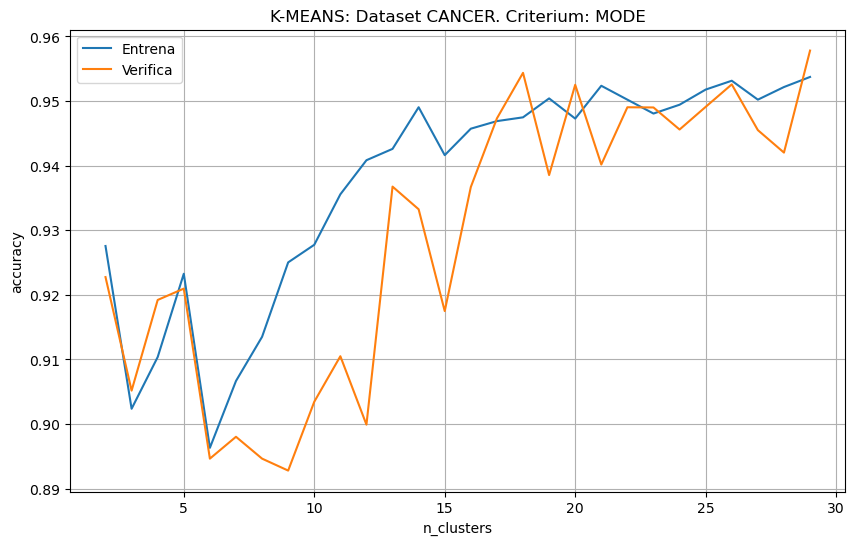

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(2,30,1), resul.Entrena.values, label="Entrena")
plt.plot(range(2,30,1), resul.Verifica.values, label="Verifica")
plt.legend()
plt.grid()
plt.xlabel("n_clusters")
plt.ylabel("accuracy")
plt.title("K-MEANS: Dataset CANCER. Criterium: MODE")

### _**Support Vector Machine**_

In [25]:
from sklearn.svm import SVC

In [26]:
class oculta_rbf(object):
    def __init__(self,n_clusters):
        self.k = n_clusters
        self.kmedias = KMeans(n_clusters=n_clusters)

    def fit(self,X_train):
        self.kmedias.fit(X_train)
        self.baricentros = self.kmedias.cluster_centers_
        d = euclidean_distances(self.baricentros)
        self.sigma = np.sum(d) / (d.shape[0]-1)
        
    def predict(self,X_test):
        return np.exp((-euclidean_distances(X_test, self.baricentros)**2)/(2*(self.sigma**2)))
    


In [27]:
aciertos_svm = pd.DataFrame(index=range(2,10,1), columns = ['Aciertos'])
aciertos_svm.index.name = "Grados"

In [34]:
# Validación Cruzada con el óptimo de clusters
for grad in range(2,10):
    aciertos = 0
    SVC(degree=grad,kernel='poly')
    K = 10
    kf = KFold(n_splits=K)
    r_clf = pd.DataFrame(columns=['Entrena','Verifica','T. Ejecución'])
    for train_index, test_index in tqdm(kf.split(X),total = kf.get_n_splits(X)):
            oculta = oculta_rbf(29)        # optimo

            X_train = X[train_index,:]
            y_train = y[train_index]
            X_test = X[test_index,:]
            y_test = y[test_index]

            oculta.fit(X_train)

            X_svm_train = oculta.predict(X_train)
            X_svm_test = oculta.predict(X_test)

            escaler = MinMaxScaler()
            escaler.fit(X_svm_train, X_svm_test)
            
            X_svm_train = escaler.transform(X_svm_train)
            X_svm_test = escaler.transform(X_svm_test)            

            svm = SVC(kernel='poly', degree=grad, verbose=False)
            svm.fit(X_svm_train,y_train)
            aciertos += svm.score(X_svm_test,y_test)
    
    aciertos = aciertos/10
    print("Tasa de aciertos: \t",aciertos)
    aciertos_svm.loc[grad] = aciertos



100%|██████████| 10/10 [00:02<00:00,  3.78it/s]


Tasa de aciertos: 	 0.9648496240601501


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]


Tasa de aciertos: 	 0.96312656641604


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


Tasa de aciertos: 	 0.9701127819548871


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


Tasa de aciertos: 	 0.9560463659147869


100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


Tasa de aciertos: 	 0.9507832080200501


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


Tasa de aciertos: 	 0.9525375939849624


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


Tasa de aciertos: 	 0.9455513784461151


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

Tasa de aciertos: 	 0.9525375939849623


In [35]:
aciertos_svm

,Aciertos
Grados,
2,0.96485
3,0.963127
4,0.970113
5,0.956046
6,0.950783
7,0.952538
8,0.945551
9,0.952538


Text(0, 0.5, 'accuracy')

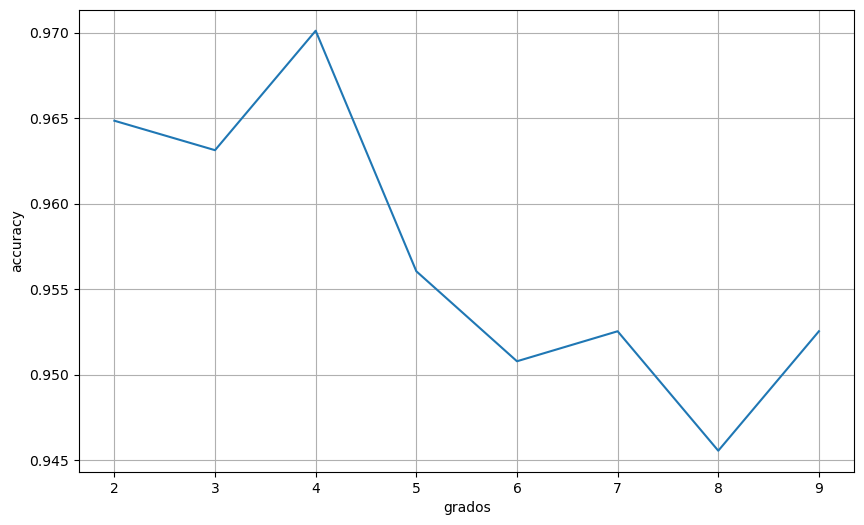

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10,1), aciertos_svm.Aciertos.values)
plt.grid()
plt.xlabel("grados")
plt.ylabel("accuracy")